#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random


X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def predict_logistic_regression(descriptors, target, logit=None):
    if logit is None:
        logit = LogisticRegression(solver='lbfgs', random_state=0, max_iter=10000).fit(descriptors, target)
    logit.predict(descriptors)
    return logit

def score_logit(descriptors, target, logit):
    predictions = logit.predict_proba(descriptors)
    falsePositiveRate, truePositiveRate, thresholds = metrics.roc_curve(target, predictions[::, 1])
    areaUnderCurve = metrics.auc(falsePositiveRate, truePositiveRate)
    return areaUnderCurve

In [54]:
# Your code goes here
print('Train Data')
predictedModel = predict_logistic_regression(X_train, y_train, None)
print(predictedModel.score(X_train, y_train))
print('Test Data')
testModel = predict_logistic_regression(X_test, y_test, predictedModel)
print(testModel.score(X_test, y_test))

areaUnderCurve = score_logit(X_test, y_test, predictedModel)

print('AUC')
print(areaUnderCurve)

Train Data
0.8708955223880597
Test Data
0.85
AUC
0.9338442735184113


b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

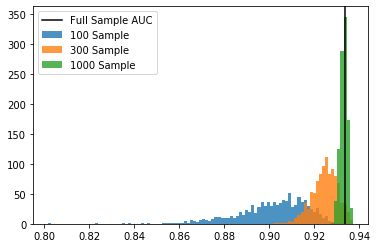

In [55]:
aucHundred = []
aucThreeHundred = []
aucThousand = []
# Your code goes here
for i in range(1000):
    hundredIndexes = random.sample(range(len(X_train)), 100)
    threeHundredIndexes = random.sample(range(len(X_train)), 300)
    thousandIndexes = random.sample(range(len(X_train)), 1000)
    
    hundredPredicted = predict_logistic_regression(X_train[hundredIndexes], y_train[hundredIndexes], None)
    threeHundredPredicted = predict_logistic_regression(X_train[threeHundredIndexes], y_train[threeHundredIndexes], None)
    thousandPredicted = predict_logistic_regression(X_train[thousandIndexes], y_train[thousandIndexes], None)
    
    aucHundred.append(score_logit(X_test, y_test, hundredPredicted))
    aucThreeHundred.append(score_logit(X_test, y_test, threeHundredPredicted))
    aucThousand.append(score_logit(X_test, y_test, thousandPredicted))

bins = np.linspace(min(aucHundred), max(aucThousand), 100)
plt.axvline(areaUnderCurve,color='black', label = 'Full Sample AUC', linestyle='-')
plt.hist(aucHundred, bins, alpha=0.8, label='100 Sample')
plt.hist(aucThreeHundred, bins, alpha=0.8, label='300 Sample')
plt.hist(aucThousand, bins, alpha=0.8, label='1000 Sample')
plt.legend(loc='best')
plt.show()

c. What pattern did you see from the plot you get from 3b? Explain your findings.

AUC values increase, while their spread decreases as sample size increases. This is easily explained by the changes in sample size.
The more training data you have, the better your predictions will be, and your prediction accuracy will have less variance when comapred
against predictions made with a smaller training set.  